In [1]:
import json
import pandas as pd
import re
import seaborn as sns
import numpy as np

from pathlib import Path

results_path = Path("..", "..", "experiments", "models", "nlp", "eval_results.json")


In [2]:
with results_path.open() as f:
    results = json.load(f)
data = {"model": [], "dataset": [], "split": [], "acc": []}
for model, model_res in results.items():
    for dataset, split_res in model_res.items():
        for split, info in split_res.items():
            data["model"].append(model)
            data["dataset"].append(dataset)
            data["split"].append(split)
            data["acc"].append(info["accuracy"])
data = pd.DataFrame.from_dict(data)


def extract_setting(s: str):
    # Define the regex pattern
    # The pattern looks for one of the words "RandomLabels", "Augmentation", "Shortcuts" between underscores
    pattern = r"_(RandomLabels|Augmentation|Shortcut|Normal)_"

    # Use re.search to find the pattern in the input string
    match = re.search(pattern, s)

    # Extract the matched string if it exists
    if match:
        extracted_label = match.group(1)
        return extracted_label
    else:
        return np.nan


def extract_setting_strength(s: str):
    pattern = r"_(RandomLabels|Augmentation|Shortcut)_(\d+)_"
    match = re.search(pattern, s)

    if match:
        extracted_label = match.group(2)
        return extracted_label
    else:
        return np.nan


data["train_dataset_base"] = data["model"].apply(lambda s: s.split("_")[2])
data["train_setting"] = data["model"].apply(extract_setting)
data["train_setting_strength"] = data["model"].apply(extract_setting_strength)
data["train_seed"] = data["model"].apply(lambda s: s.split("_")[-2])
data

,model,dataset,split,acc,train_dataset_base,train_setting,train_setting_strength,train_seed
0,NLP_BERT-L_sst2_Normal_0_None,sst2,train,0.956718,sst2,Normal,NaN,0
1,NLP_BERT-L_sst2_Normal_0_None,sst2,validation,0.922018,sst2,Normal,NaN,0
2,NLP_BERT-L_sst2_Normal_1_None,sst2,train,0.954743,sst2,Normal,NaN,1
3,NLP_BERT-L_sst2_Normal_1_None,sst2,validation,0.907110,sst2,Normal,NaN,1
4,NLP_BERT-L_sst2_Normal_2_None,sst2,train,0.988463,sst2,Normal,NaN,2
...,...,...,...,...,...,...,...,...
890,NLP_BERT-L_mnli_Augmentation_0_3_None,mnli_aug_rate0,validation_matched,0.841263,mnli,Augmentation,0,3
891,NLP_BERT-L_mnli_Augmentation_0_3_None,mnli_aug_rate10,validation_matched,0.659806,mnli,Augmentation,0,3
892,NLP_BERT-L_mnli_Augmentation_0_4_None,mnli,validation_matched,0.836373,mnli,Augmentation,0,4
893,NLP_BERT-L_mnli_Augmentation_0_4_None,mnli_aug_rate0,validation_matched,0.836373,mnli,Augmentation,0,4


In [3]:
data.train_setting.unique()

array(['Normal', 'RandomLabels', 'Shortcut', 'Augmentation'], dtype=object)

In [4]:
# data.loc[data.train_setting=="Shortcut"]
# data.iloc[346, 0]
data.loc[data.model == "NLP_BERT-L_mnli_sc_rate08385_Shortcut_08385_4_None"]

,model,dataset,split,acc,train_dataset_base,train_setting,train_setting_strength,train_seed
357,NLP_BERT-L_mnli_sc_rate08385_Shortcut_08385_4_...,mnli_sc_rate1,validation_matched,0.960774,mnli,Shortcut,08385,4
358,NLP_BERT-L_mnli_sc_rate08385_Shortcut_08385_4_...,mnli_sc_rate08385,validation_matched,0.910851,mnli,Shortcut,08385,4
359,NLP_BERT-L_mnli_sc_rate08385_Shortcut_08385_4_...,mnli_sc_rate0354,validation_matched,0.761080,mnli,Shortcut,08385,4


In [5]:
print(data[data.train_setting=="RandomLabels"].model.unique())
data.loc[data.model == "NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_0_None"]

['NLP_BERT-L_sst2_mem_rate025_RandomLabels_25_0_None'
 'NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_0_None'
 'NLP_BERT-L_sst2_mem_rate075_RandomLabels_75_0_None'
 'NLP_BERT-L_sst2_mem_rate10_RandomLabels_100_0_None'
 'NLP_BERT-L_sst2_mem_rate025_RandomLabels_25_1_None'
 'NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_1_None'
 'NLP_BERT-L_sst2_mem_rate075_RandomLabels_75_1_None'
 'NLP_BERT-L_sst2_mem_rate10_RandomLabels_100_1_None'
 'NLP_BERT-L_sst2_mem_rate025_RandomLabels_25_2_None'
 'NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_2_None'
 'NLP_BERT-L_sst2_mem_rate075_RandomLabels_75_2_None'
 'NLP_BERT-L_sst2_mem_rate10_RandomLabels_100_2_None'
 'NLP_BERT-L_sst2_mem_rate025_RandomLabels_25_3_None'
 'NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_3_None'
 'NLP_BERT-L_sst2_mem_rate075_RandomLabels_75_3_None'
 'NLP_BERT-L_sst2_mem_rate10_RandomLabels_100_3_None'
 'NLP_BERT-L_sst2_mem_rate025_RandomLabels_25_4_None'
 'NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_4_None'
 'NLP_BERT-L_sst2_mem_rate075_Ran

,model,dataset,split,acc,train_dataset_base,train_setting,train_setting_strength,train_seed
29,NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_0_None,sst2_mem_rate05,train,0.471276,sst2,RandomLabels,50,0
30,NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_0_None,sst2_mem_rate05,validation,0.443807,sst2,RandomLabels,50,0
31,NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_0_None,sst2_mem_rate0,train,0.928536,sst2,RandomLabels,50,0
32,NLP_BERT-L_sst2_mem_rate05_RandomLabels_50_0_None,sst2_mem_rate0,validation,0.899083,sst2,RandomLabels,50,0


In [6]:
data[data.train_setting=="Normal"].model.unique()
data.loc[data.model == "NLP_BERT-L_mnli_Normal_3_None"]
data.loc[data.model == "NLP_BERT-L_sst2_Normal_6_None"]


,model,dataset,split,acc,train_dataset_base,train_setting,train_setting_strength,train_seed
12,NLP_BERT-L_sst2_Normal_6_None,sst2,train,0.982613,sst2,Normal,NaN,6
13,NLP_BERT-L_sst2_Normal_6_None,sst2,validation,0.920872,sst2,Normal,NaN,6


In [7]:
data.groupby(["train_dataset_base", "train_setting"])["model"].count()

train_dataset_base  train_setting
mnli                Augmentation      70
                    Normal             5
                    RandomLabels      95
                    Shortcut          65
sst2                Augmentation     280
                    Normal            20
                    RandomLabels     100
                    Shortcut         260
Name: model, dtype: int64

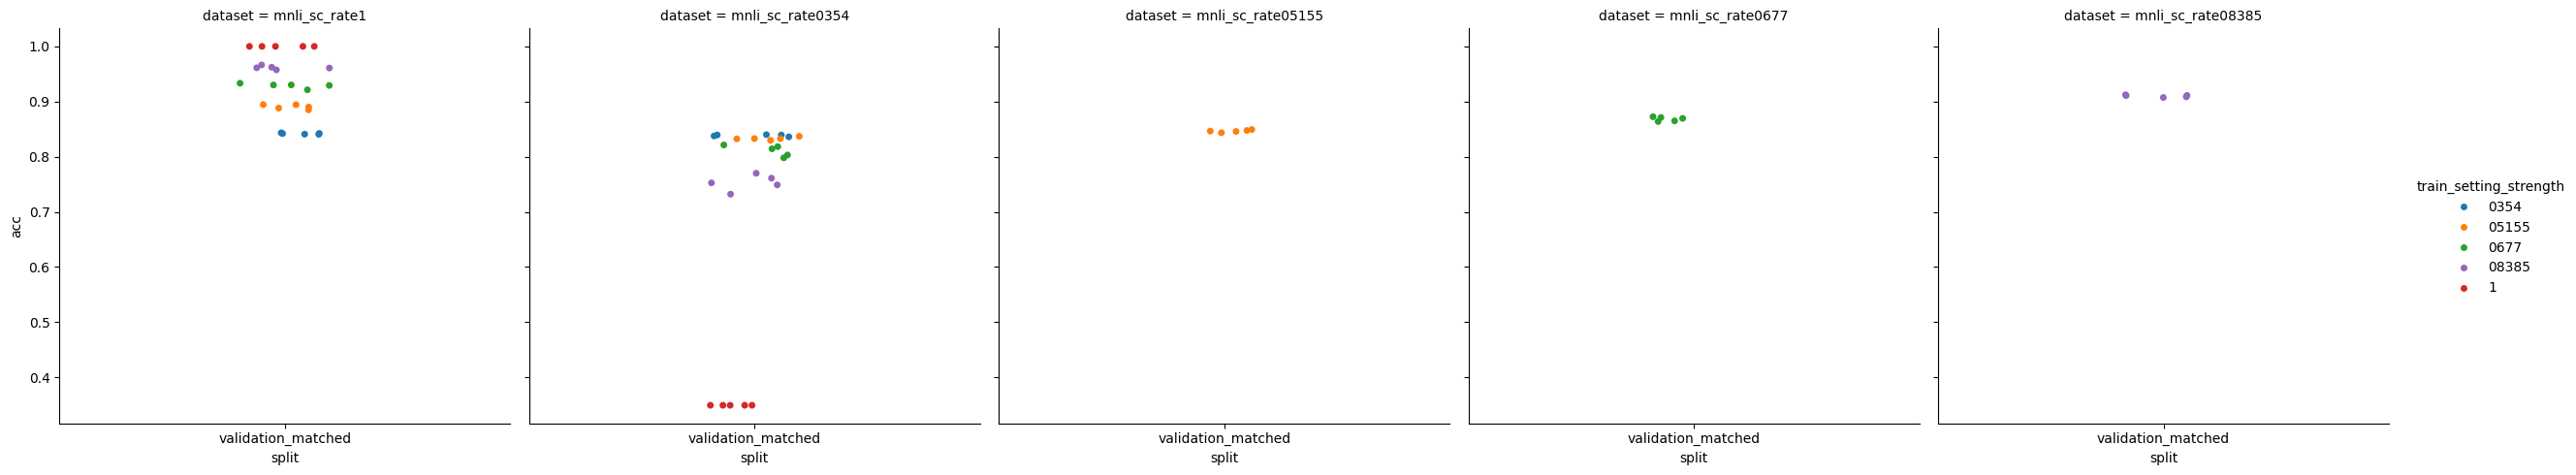

In [11]:
selection = data.loc[
    # (data.train_dataset_base == "sst2") &
    (data.train_dataset_base == "mnli") &
    # (data.train_setting == "Augmentation")
    (data.train_setting == "Shortcut")
    # (data.train_setting == "RandomLabels")
    # & (data.dataset=="sst2_aug_rate10")
    # & (data.dataset=="mnli_aug_rate0")
    # & (data.dataset.isin(["sst2_sc_rate10", "sst2_sc_rate0558"]))
    # & (data.dataset.isin(["mnli_sc_rate1", "mnli_sc_rate0354"]))
    # & (data.dataset.isin(["sst2_mem_rate0", "mnli_mem_rate0"]))
    # & (data.train_setting_strength.isin(["0", "100"]))
]

sns.catplot(
    data=selection,
    y="acc",
    hue="train_setting_strength",
    x="split",
    col="dataset",
    palette={
                "0": "C0",
                "25": "C1",
                "50": "C2",
                "75": "C4",
                "100": "C3",
                # shortcut stuff (mnli)
                "0354": "C0",
                "05155": "C1",
                "0677": "C2",
                "08385": "C4",
                "1": "C3",
                # shortcut (sst2)
                "0558": "C0",
                "0668": "C1",
                "0779": "C2",
                "0889": "C4",
                "10": "C3",
            },

)


In [9]:
data.loc[
    (data.train_dataset_base == "sst2") &
    (data.train_setting == "Normal")
].describe()


,acc
count,20.000000
mean,0.941271
std,0.030155
min,0.904817
25%,0.913417
50%,0.940301
75%,0.962074
max,0.988537
